In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data for Analysis**

In [ ]:
df=pd.read_csv("BMW_Car_Sales_Classification (1).csv")
df

Model  Year         Region   Color Fuel_Type Transmission  \
0      5 Series  2016           Asia     Red    Petrol       Manual   
1            i8  2013  North America     Red    Hybrid    Automatic   
2      5 Series  2022  North America    Blue    Petrol    Automatic   
3            X3  2024    Middle East    Blue    Petrol    Automatic   
4      7 Series  2020  South America   Black    Diesel       Manual   
...         ...   ...            ...     ...       ...          ...   
49995        i3  2014           Asia     Red    Hybrid       Manual   
49996        i3  2023    Middle East  Silver  Electric       Manual   
49997  5 Series  2010    Middle East     Red    Petrol    Automatic   
49998        i3  2020           Asia   White  Electric    Automatic   
49999        X1  2020  North America    Blue    Diesel       Manual   

       Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0                3.5      151748      98740          8300                 High  
1                1.6      121671      79219          3428                  Low  
2                4.5       10991     113265          6994                  Low  
3                1.7       27255      60971          4047                  Low  
4                2.1      122131      49898          3080                  Low  
...              ...         ...        ...           ...                  ...  
49995            4.6      151030      42932          8182                 High  
49996            4.2      147396      48714          9816                 High  
49997            4.5      174939      46126          8280                 High  
49998            3.8        3379      58566          9486                 High  
49999            3.3      171003      77492          1764                  Low  

[50000 rows x 11 columns]

Load the BMW sales dataset into a pandas DataFrame called df

# **Explore and Clean the Data**

In [ ]:
df.head(5)

Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low

will display the first 5 rows of the DataFrame

In [ ]:
df.tail(5)

Model  Year         Region   Color Fuel_Type Transmission  \
49995        i3  2014           Asia     Red    Hybrid       Manual   
49996        i3  2023    Middle East  Silver  Electric       Manual   
49997  5 Series  2010    Middle East     Red    Petrol    Automatic   
49998        i3  2020           Asia   White  Electric    Automatic   
49999        X1  2020  North America    Blue    Diesel       Manual   

       Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
49995            4.6      151030      42932          8182                 High  
49996            4.2      147396      48714          9816                 High  
49997            4.5      174939      46126          8280                 High  
49998            3.8        3379      58566          9486                 High  
49999            3.3      171003      77492          1764                  Low

will display the last 5 rows of your DataFrame

In [ ]:
df.shape

(50000, 11)

the number of rows and columns in the BMW sales DataFrame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


Lists all column names and there data types

In [ ]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

shows the number of missing (null/NaN) values in each column of the BMW sales DataFrame.

In [ ]:
df['Model'].unique()

array(['5 Series', 'i8', 'X3', '7 Series', 'M5', '3 Series', 'X1', 'M3',
       'X5', 'i3', 'X6'], dtype=object)

display all the distinct BMW car models present in the dataset.

In [ ]:
df['Region'].unique()

array(['Asia', 'North America', 'Middle East', 'South America', 'Europe',
       'Africa'], dtype=object)

display all the distinct BMW car region present in the dataset.

In [ ]:
df['Color'].unique()

array(['Red', 'Blue', 'Black', 'Silver', 'White', 'Grey'], dtype=object)

display all the distinct BMW car color present in the dataset.

In [ ]:
df['Fuel_Type'].unique()

array(['Petrol', 'Hybrid', 'Diesel', 'Electric'], dtype=object)

display all the distinct BMW car fuel_type present in the dataset.

In [ ]:
df['Sales_Classification'].unique()

array(['High', 'Low'], dtype=object)

Display all the distinct BMW car sales_classification present in the dataset.

In [ ]:
df.duplicated().sum()

np.int64(0)

returns the number of duplicate rows in the DataFrame.

In [ ]:
df.describe()

Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50178.000000   52434.750000   2588.000000
50%     2017.000000       3.200000  100388.500000   75011.500000   5087.000000
75%     2021.000000       4.100000  150630.250000   97628.250000   7537.250000
max     2024.000000       5.000000  199996.000000  119998.000000   9999.000000

outputs summary statistics for all numeric columns in the BMW sales dataset

In [ ]:
categorical_colum=df.select_dtypes(include=['object'])
for i in categorical_colum:
    print(i)
    print(df[i].describe())
    print("*************************************************")

Model
count        50000
unique          11
top       7 Series
freq          4666
Name: Model, dtype: object
*************************************************
Region
count     50000
unique        6
top        Asia
freq       8454
Name: Region, dtype: object
*************************************************
Color
count     50000
unique        6
top         Red
freq       8463
Name: Color, dtype: object
*************************************************
Fuel_Type
count      50000
unique         4
top       Hybrid
freq       12716
Name: Fuel_Type, dtype: object
*************************************************
Transmission
count      50000
unique         2
top       Manual
freq       25154
Name: Transmission, dtype: object
*************************************************
Sales_Classification
count     50000
unique        2
top         Low
freq      34754
Name: Sales_Classification, dtype: object
*************************************************


Gets all categorical (object dtype) columns in the DataFrame.

# **visualization**

# *univariant*

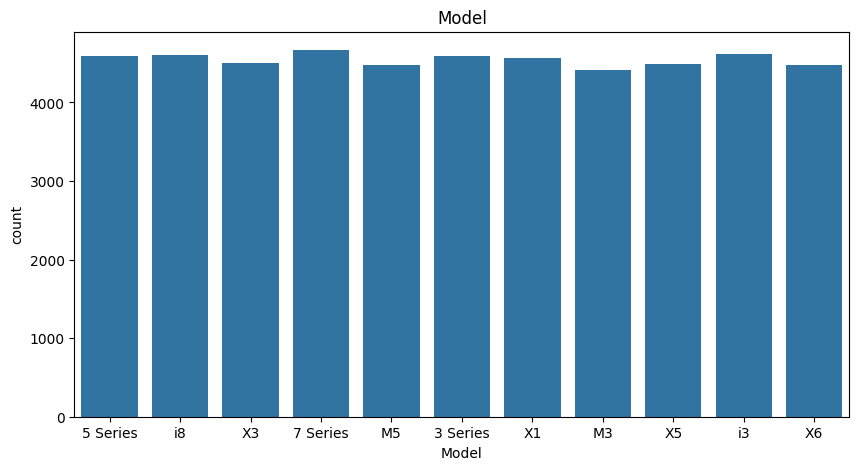

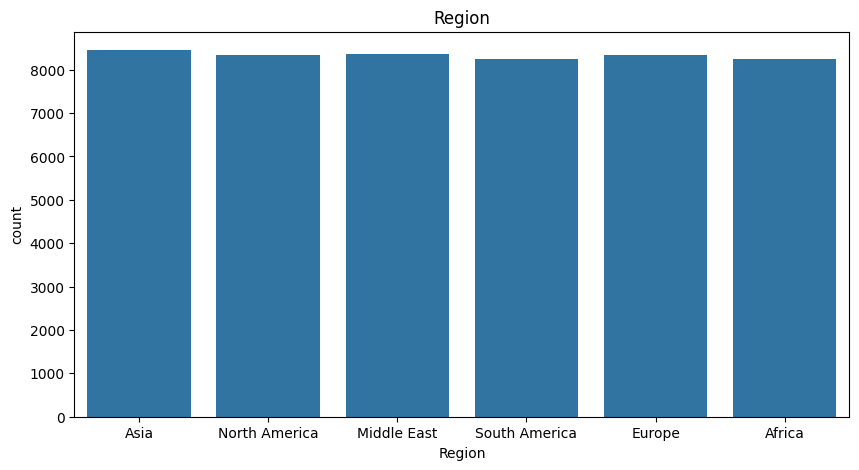

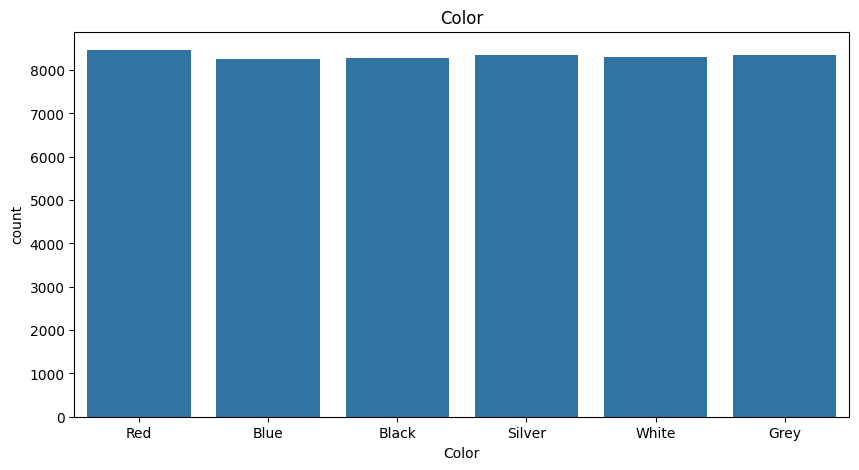

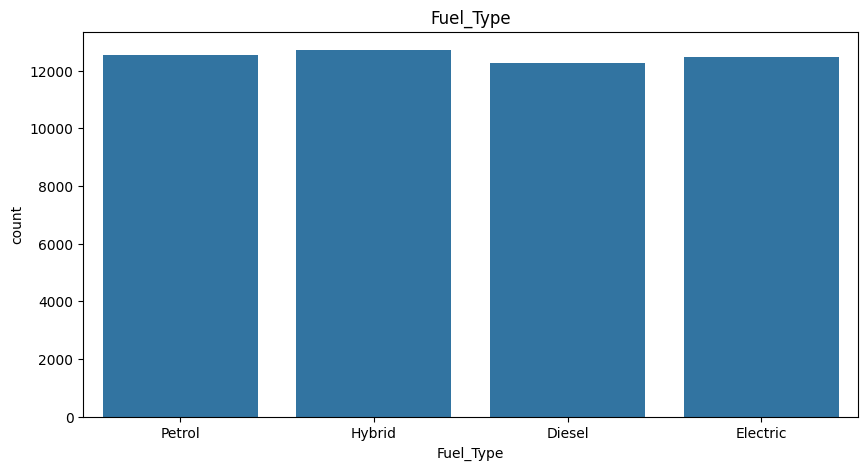

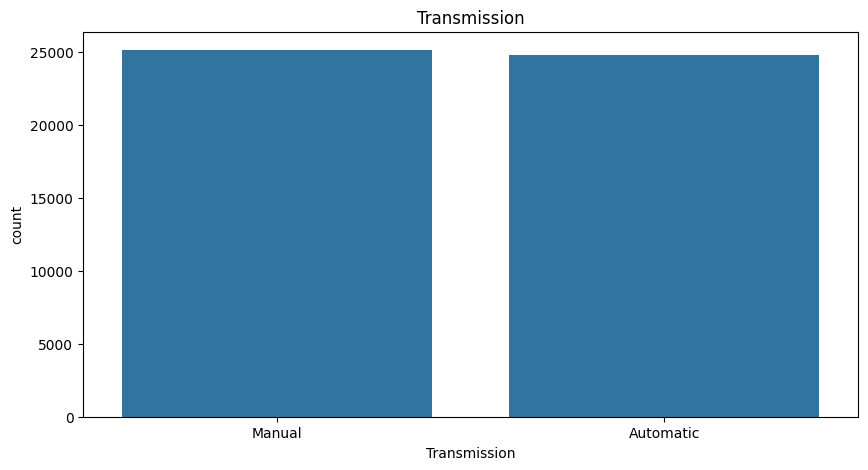

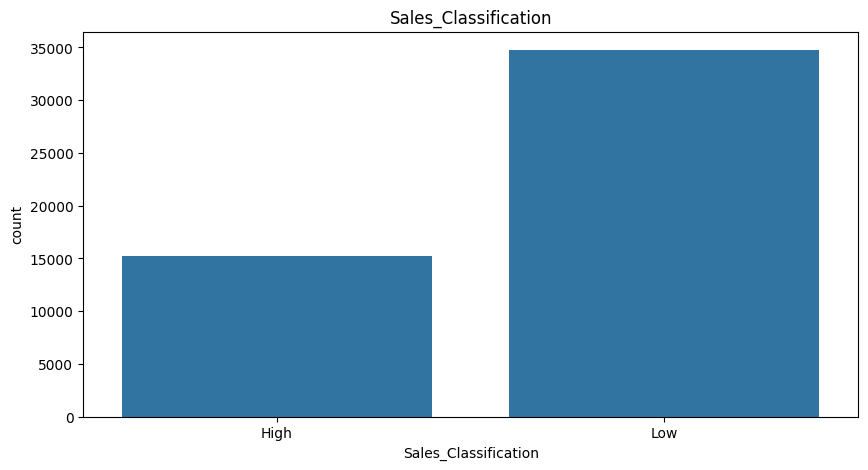

In [ ]:
for i in categorical_colum:
  plt.figure(figsize=(10,5))
  sns.countplot(x=i,data=df)
  plt.title(i)
  plt.show()

Generate a countplot for each categorical column in the BMW sales DataFrame.

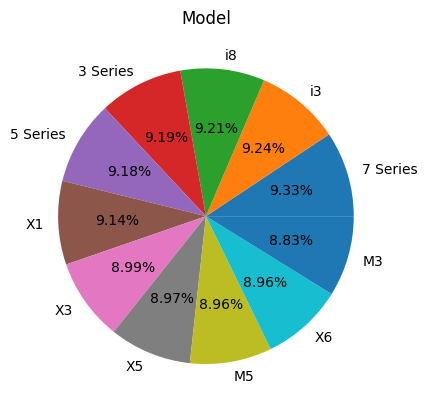

**********************************


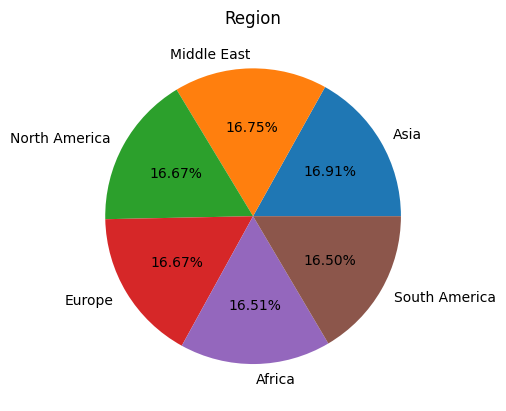

**********************************


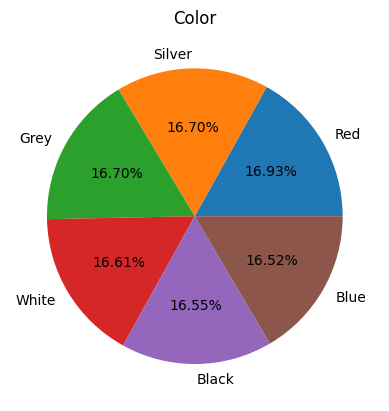

**********************************


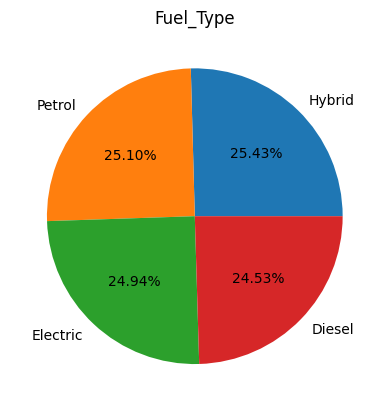

**********************************


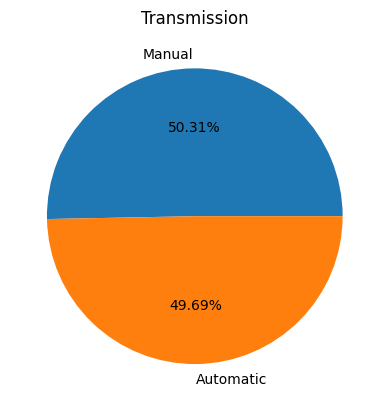

**********************************


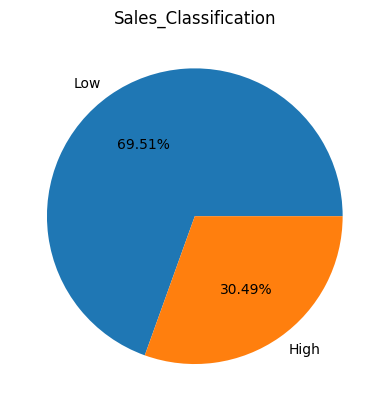

**********************************


In [ ]:
for i in categorical_colum:
  plt.pie(df[i].value_counts(),labels=df[i].value_counts().index,autopct='%1.2f%%')
  plt.title(i)
  plt.show()
  print('**********************************')

Generate a pie chart for each categorical column in the BMW sales dataset

In [ ]:
Numerical_colum=df.select_dtypes(include=['int64','float64'])

Selects all the numerical (integer or float) columns from the DataFrame.

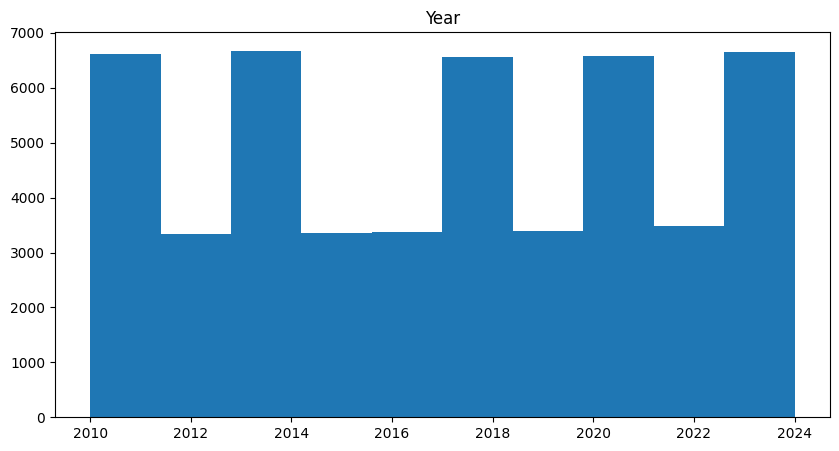

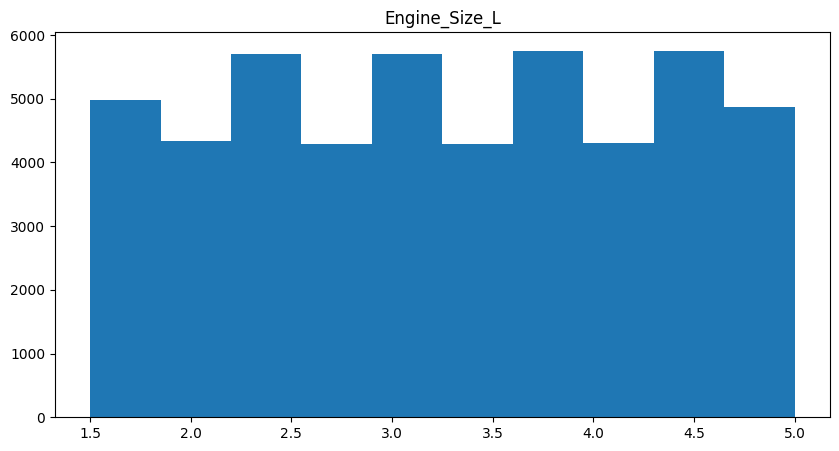

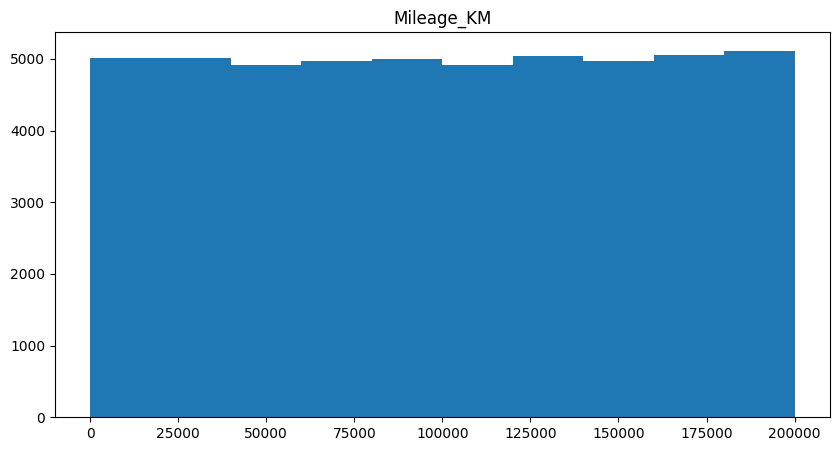

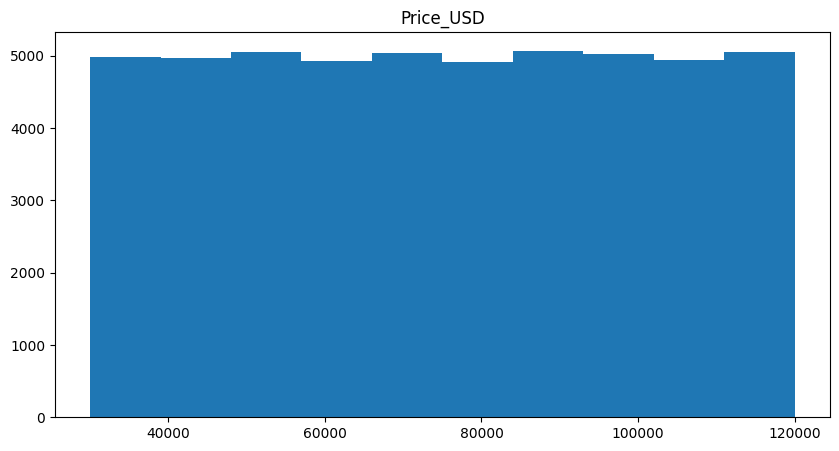

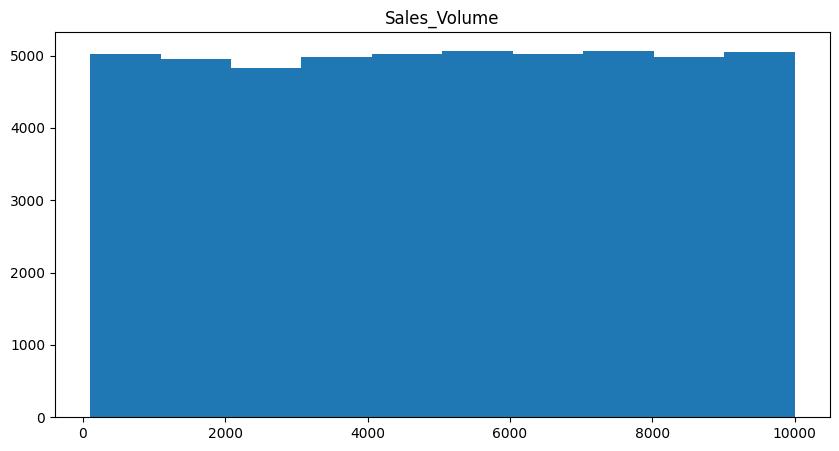

In [ ]:
for i in Numerical_colum.columns:
  plt.figure(figsize=(10,5))
  plt.hist(x=i, data=df)
  plt.title(i)
  plt.show()

plot a histogram for each numerical column in the DataFrame.

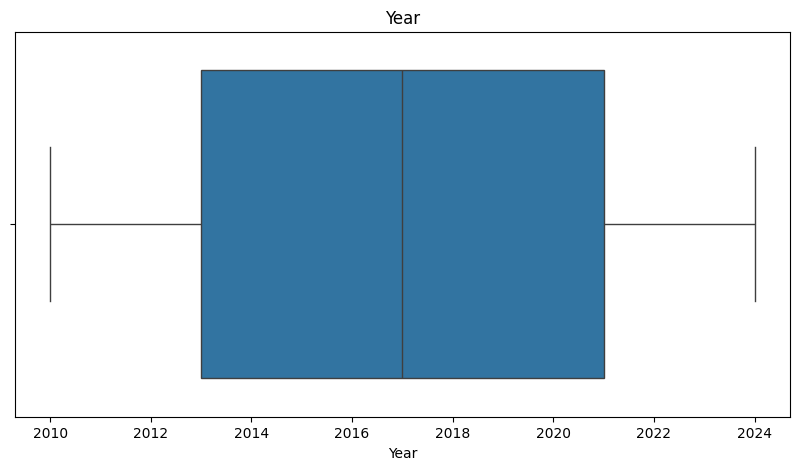

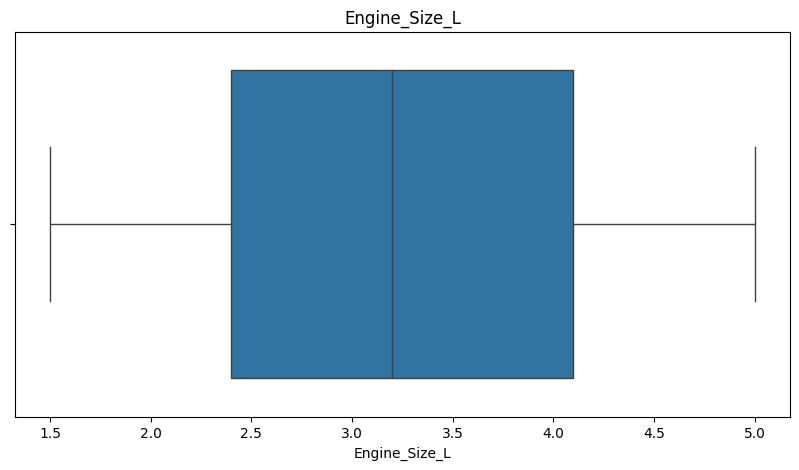

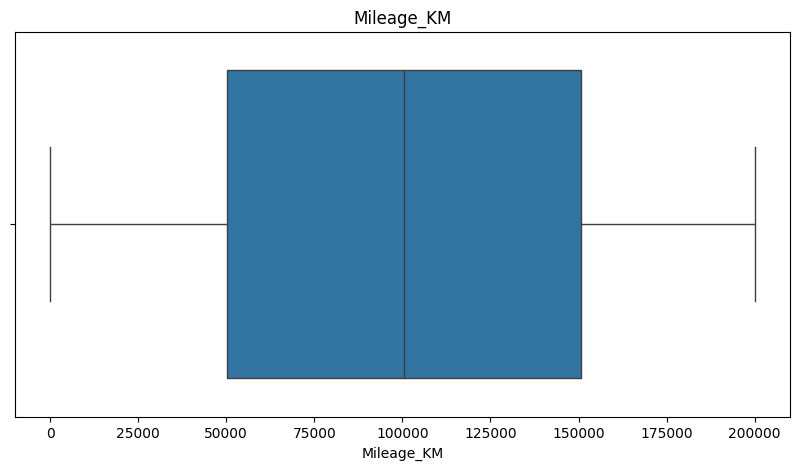

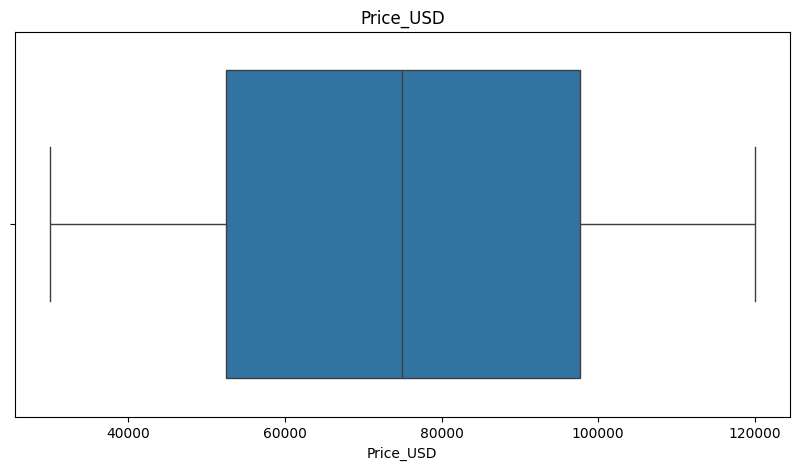

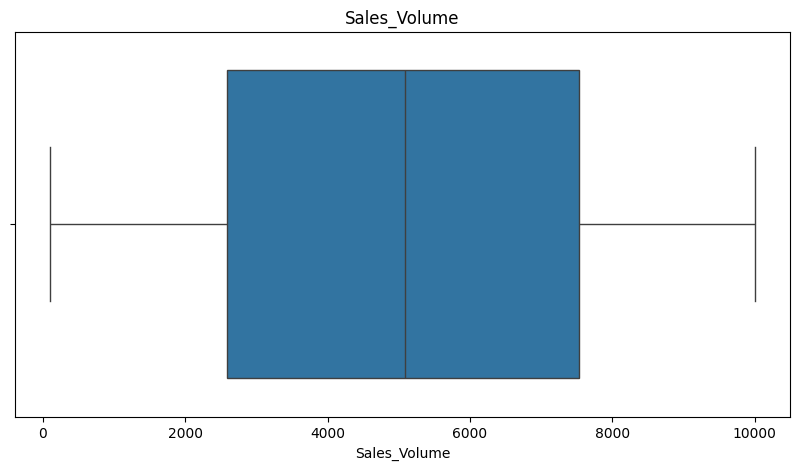

In [ ]:
for i in Numerical_colum.columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(x=i,data=df)
  plt.title(i)
  plt.show()

produce a boxplot for each numerical column in the dataset.

# **Bivariant**

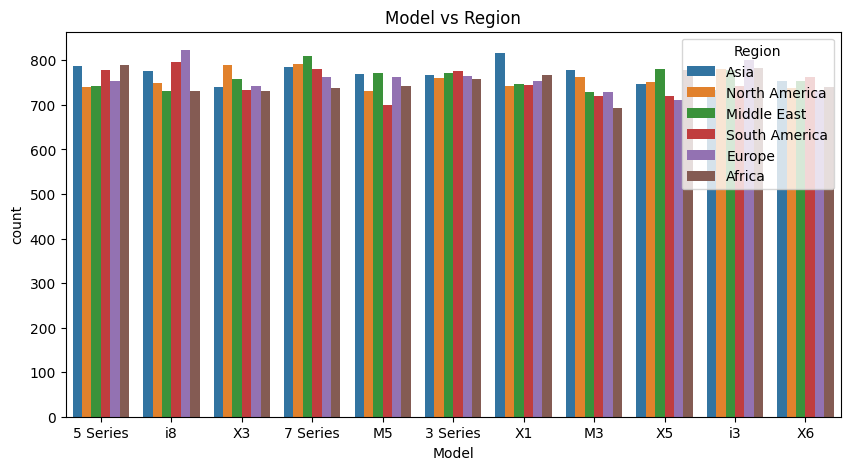

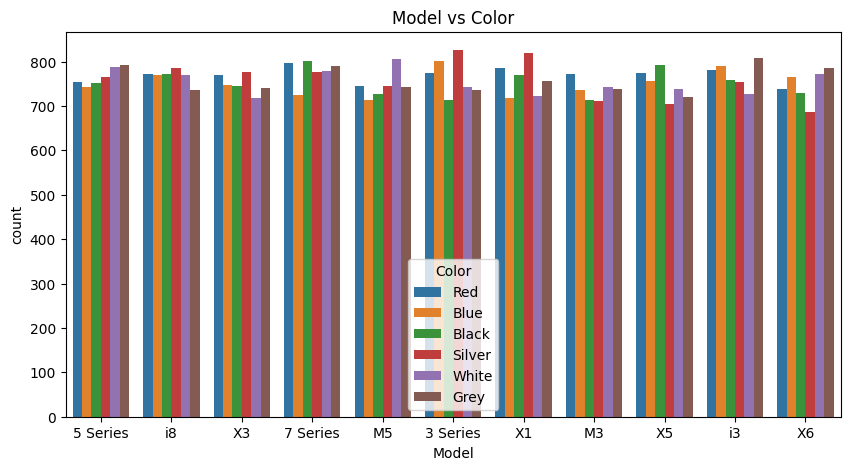

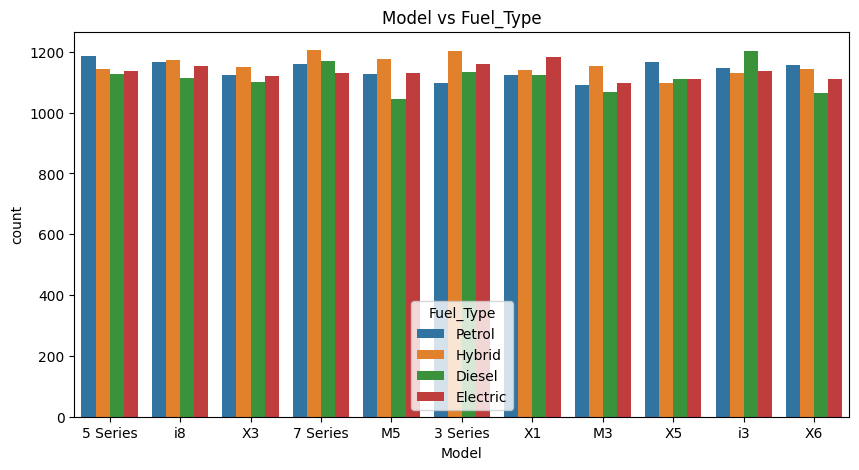

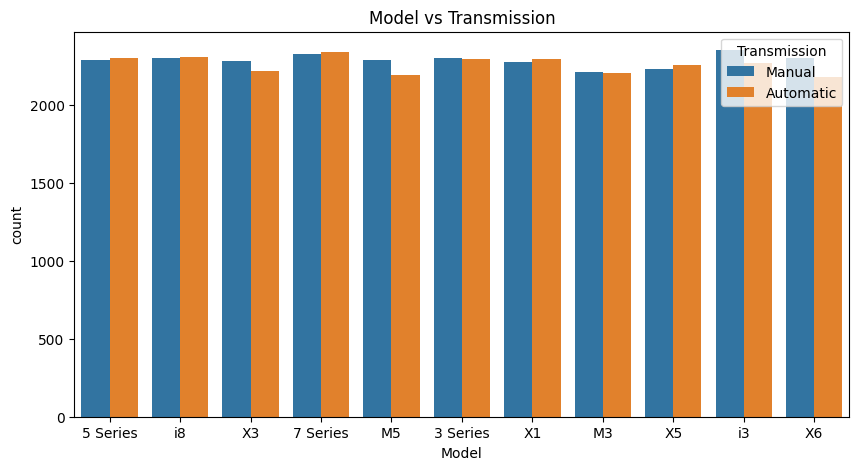

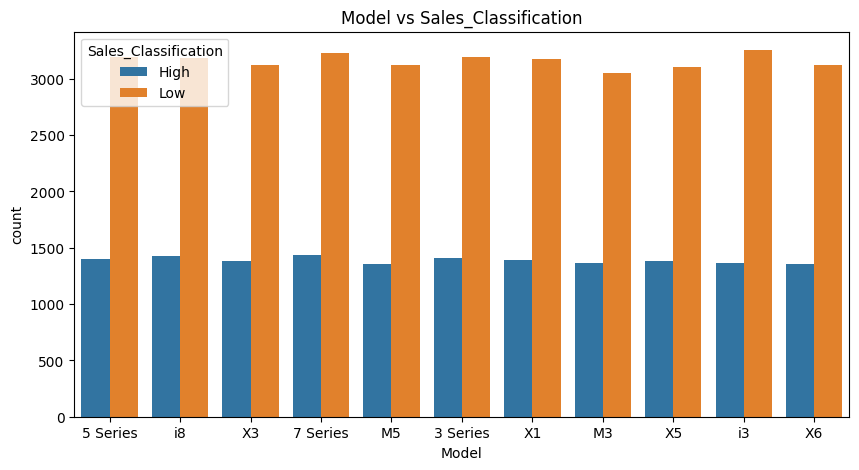

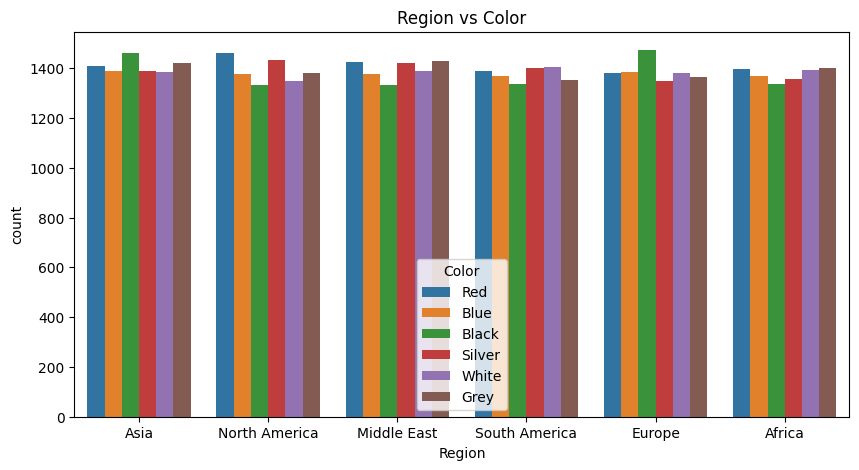

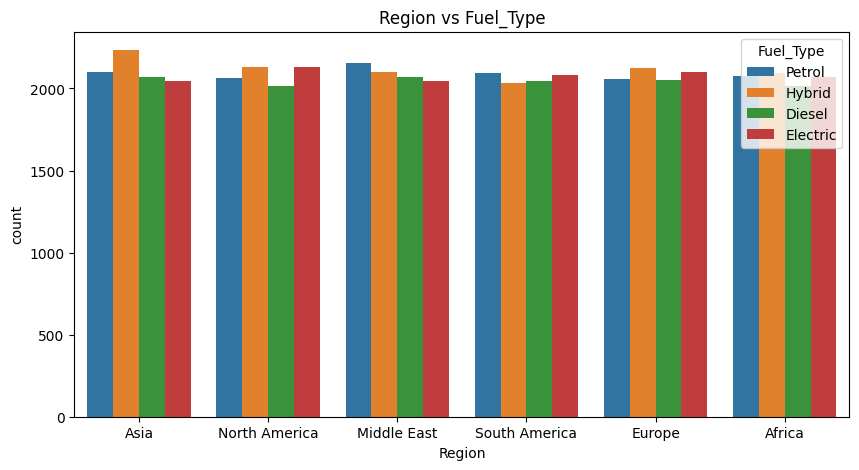

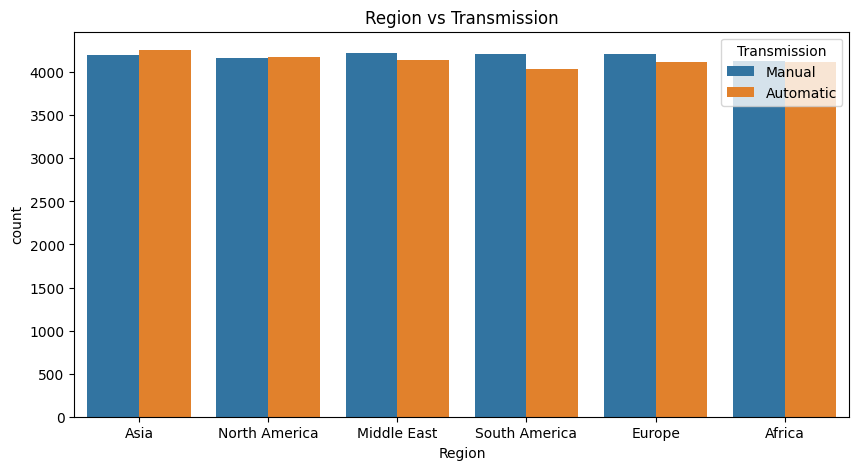

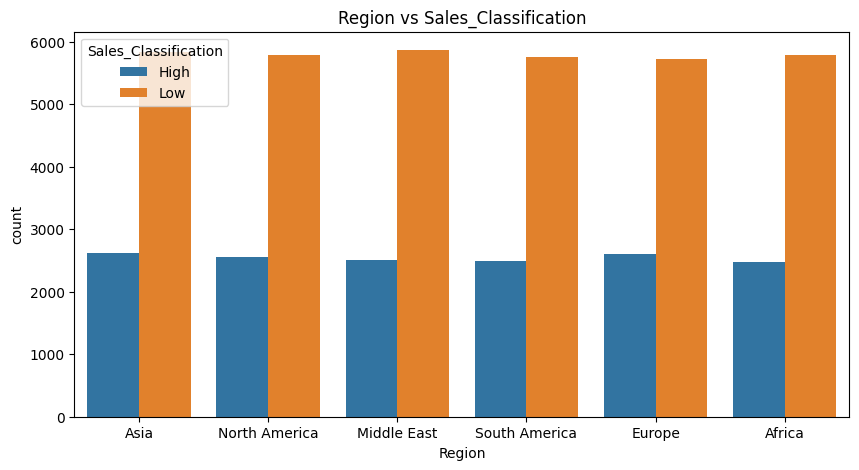

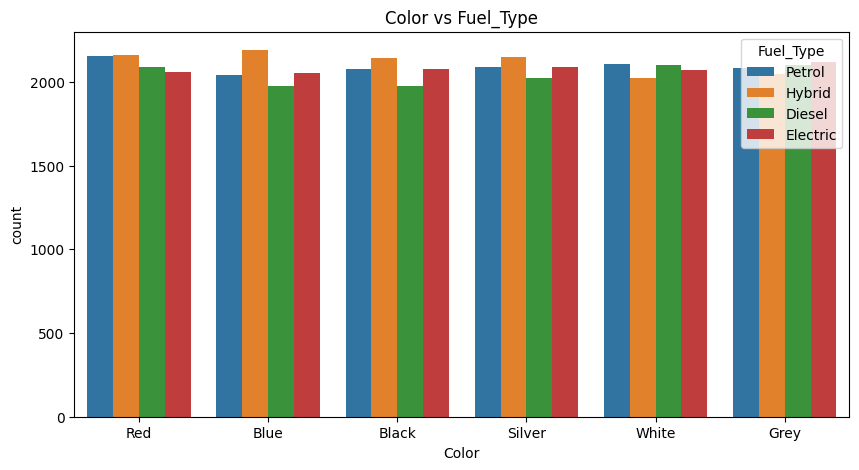

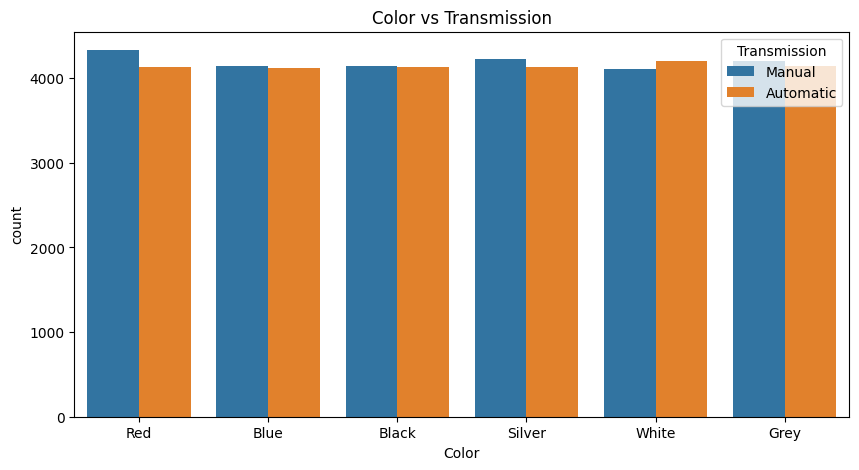

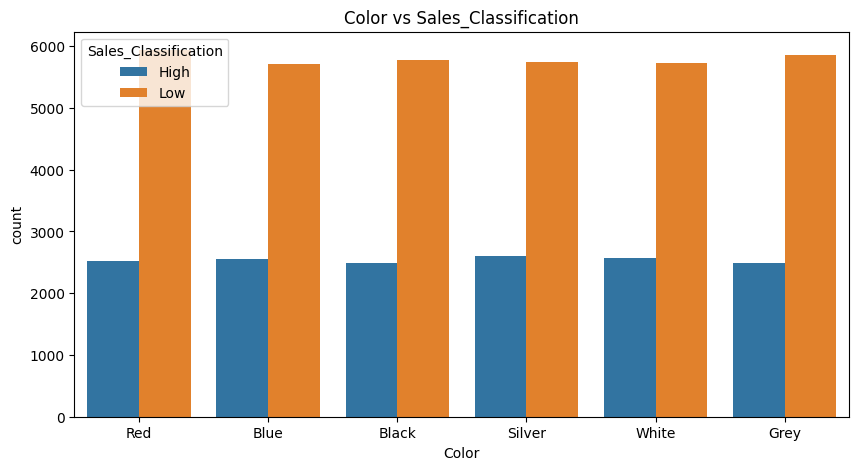

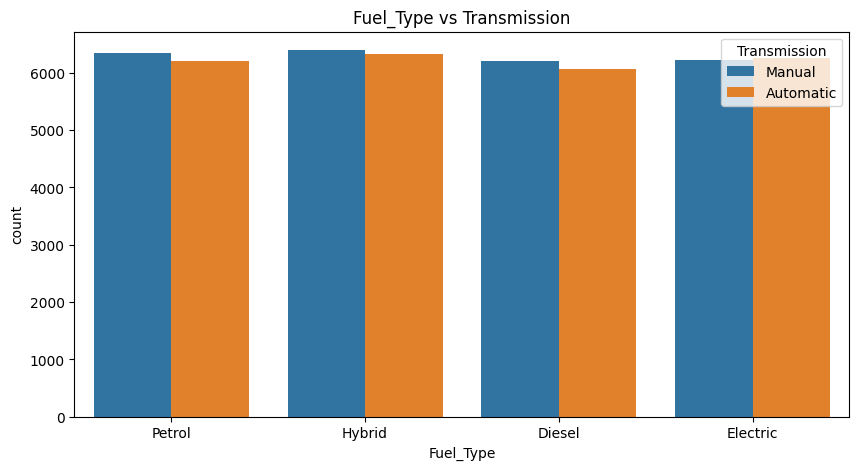

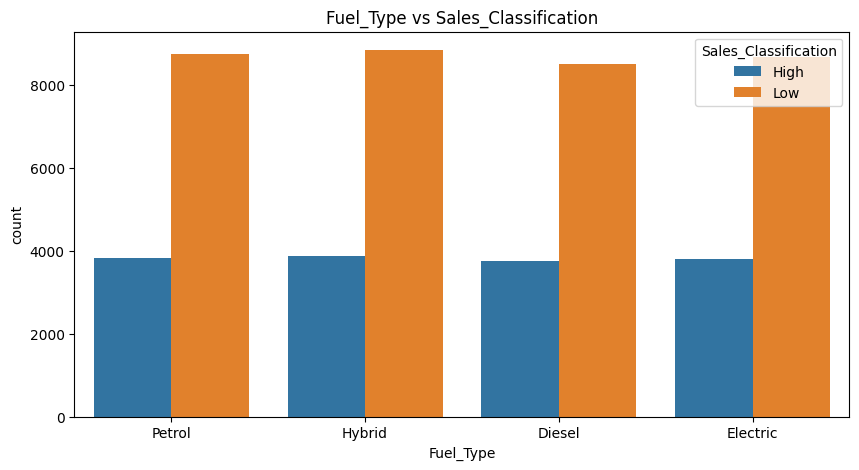

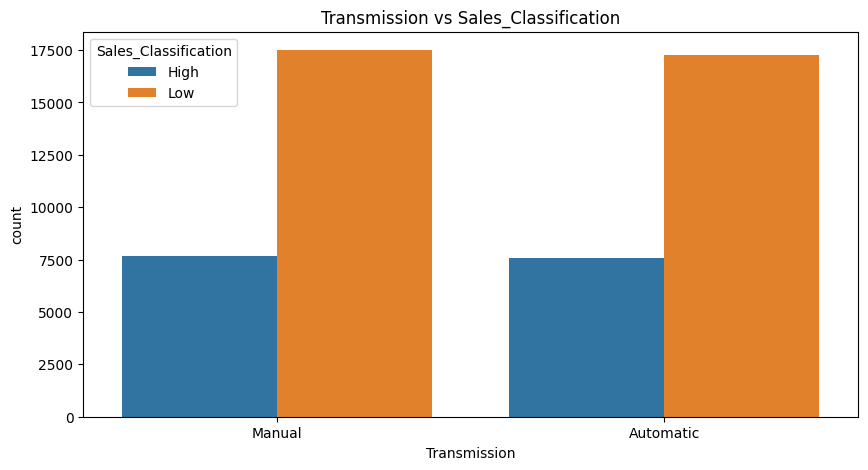

In [ ]:
for i in range(len(categorical_colum.columns)):
  for j in range(i+1,len(categorical_colum.columns)):
    plt.figure(figsize=(10,5))
    sns.countplot(x=categorical_colum.columns[i],hue=categorical_colum.columns[j],data=df)
    plt.title(f'{categorical_colum.columns[i]} vs {categorical_colum.columns[j]}')
    plt.show()

creates countplots comparing pairs of categorical columns in the DataFrame

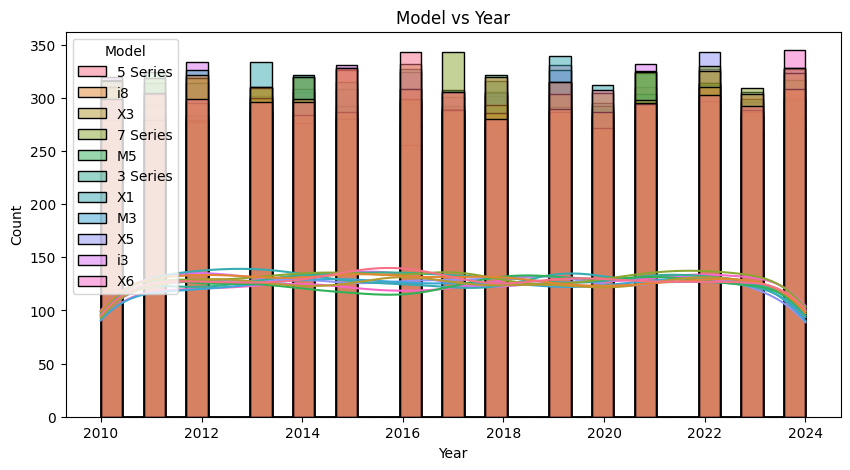

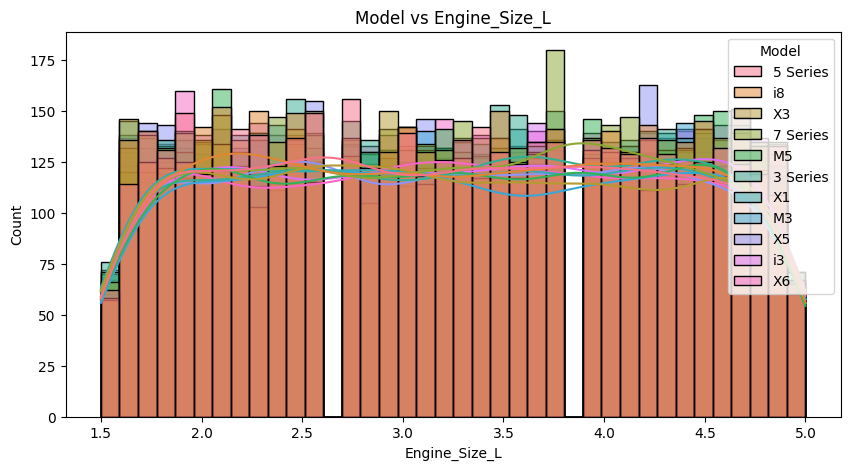

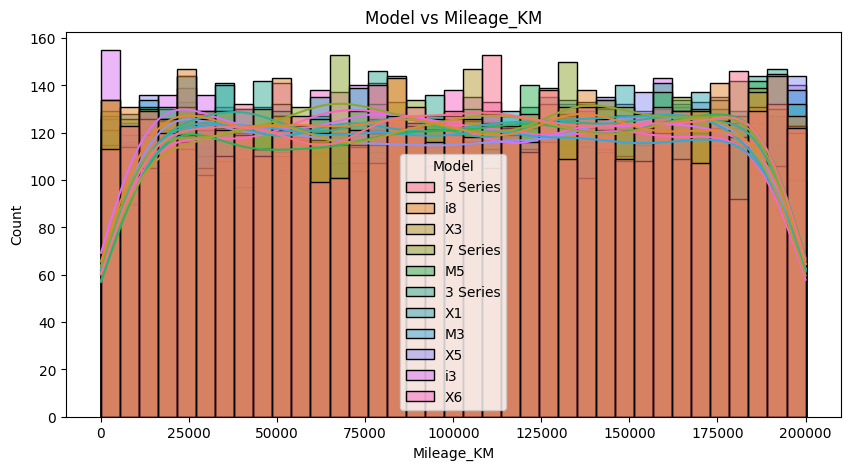

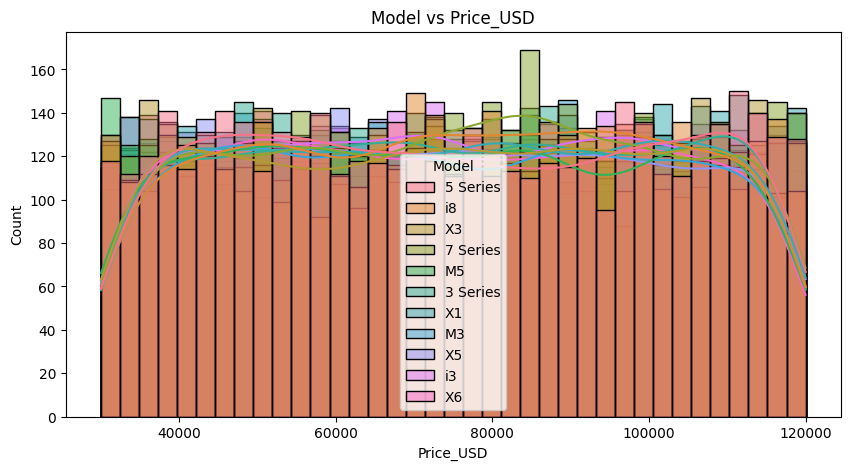

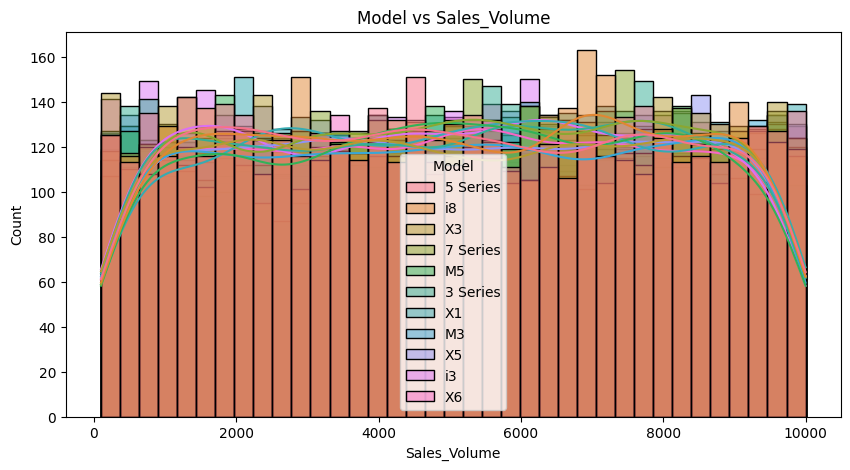

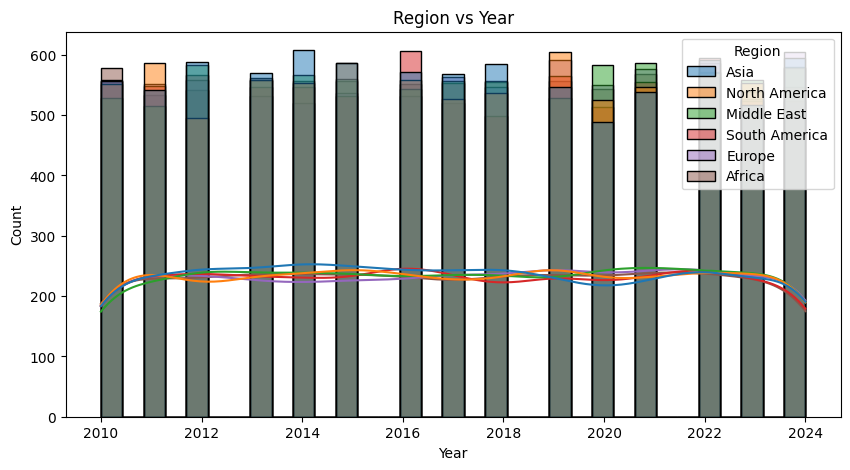

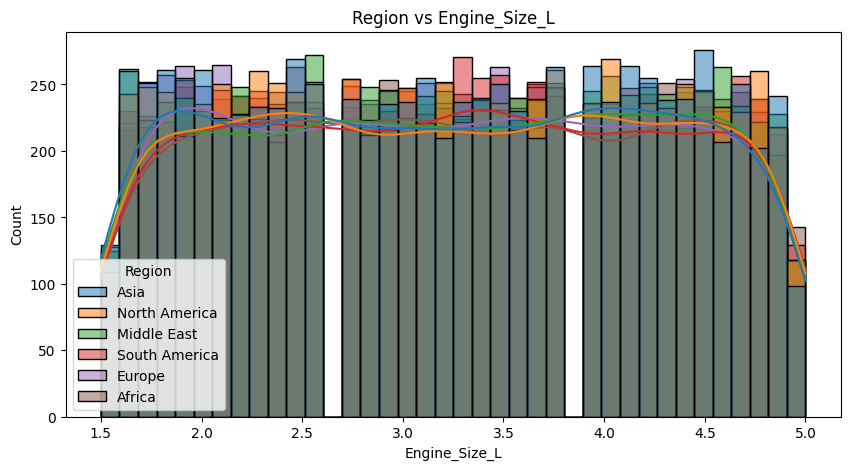

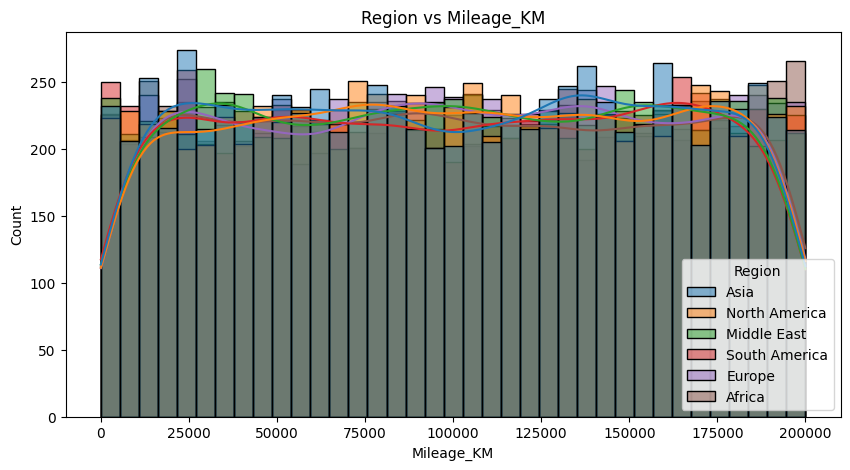

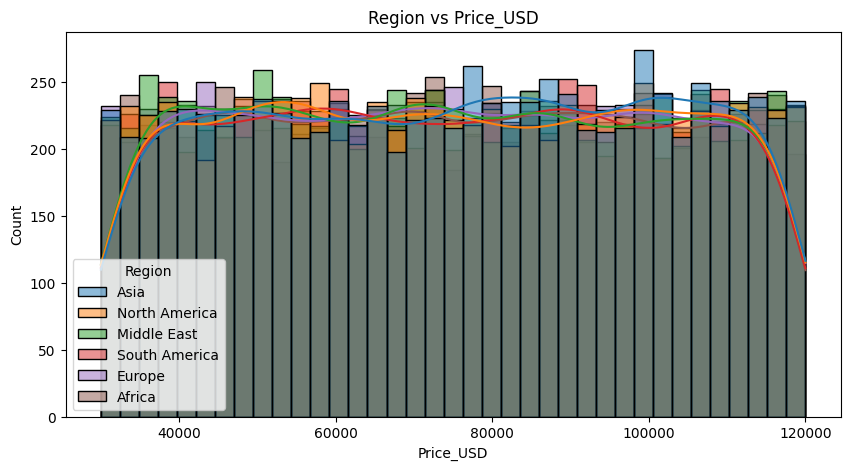

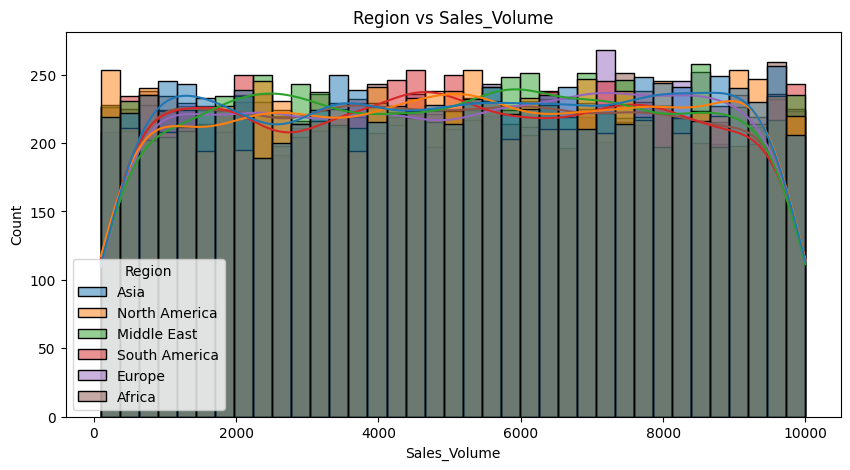

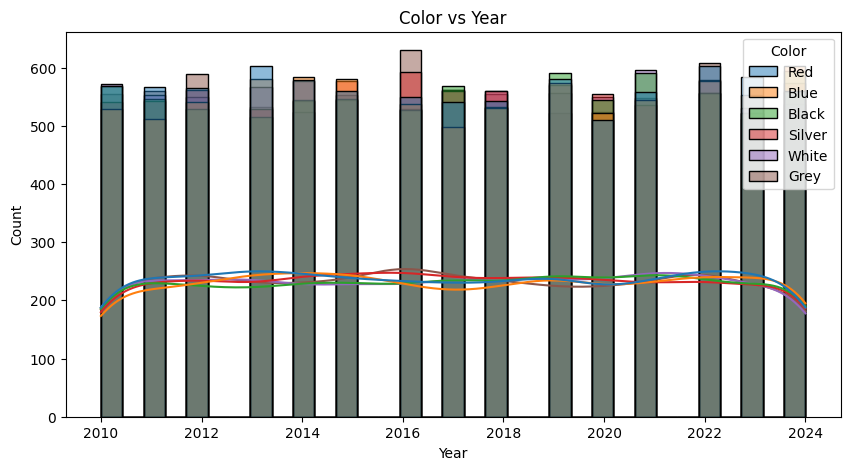

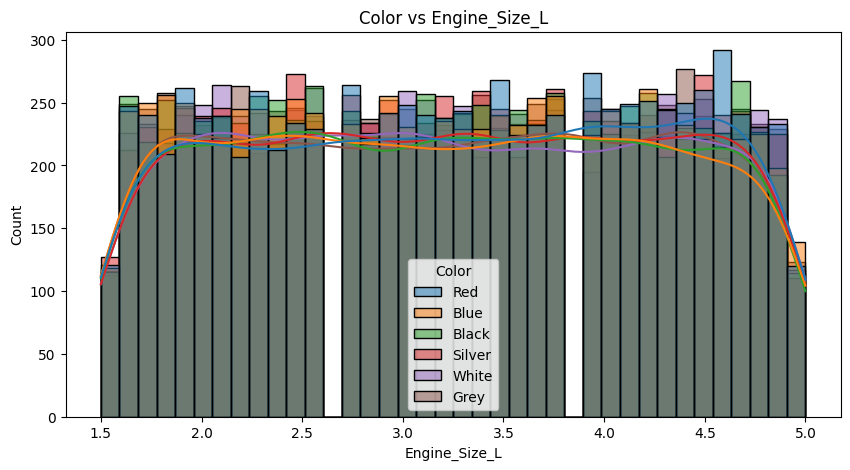

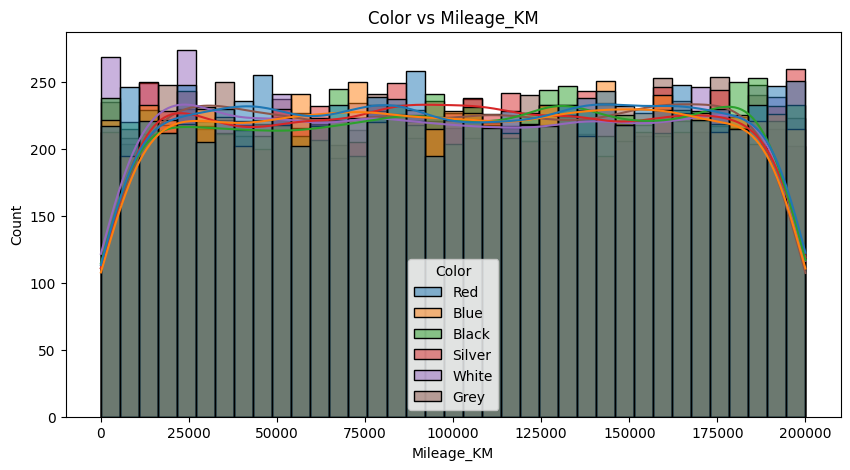

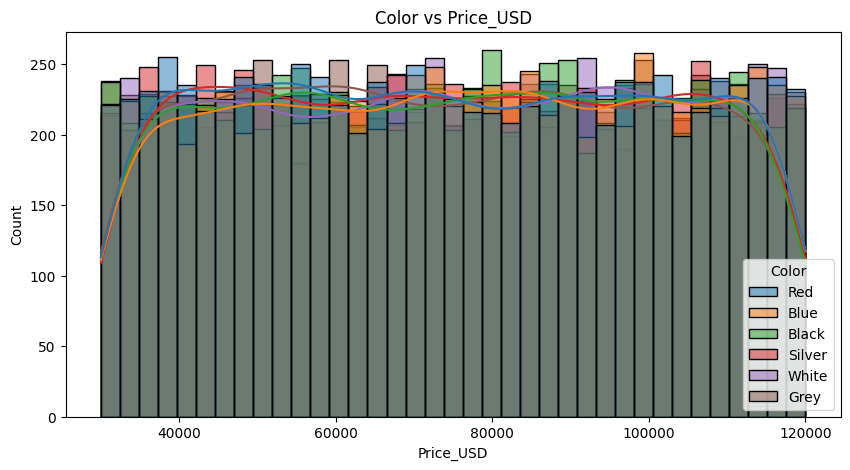

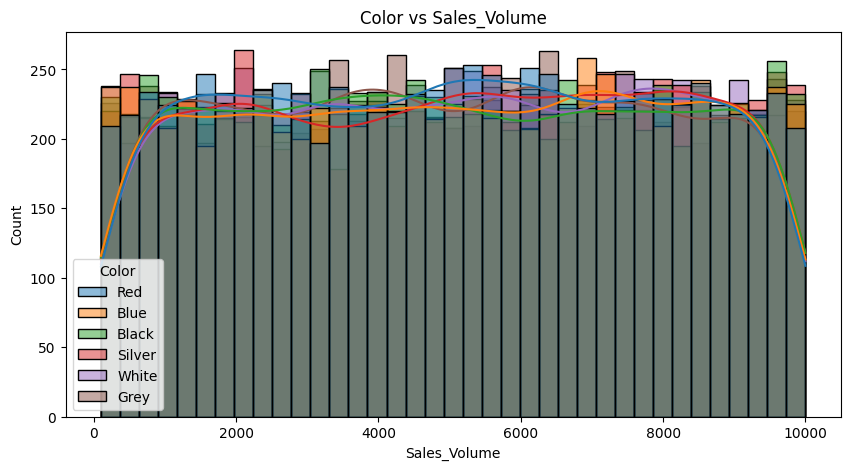

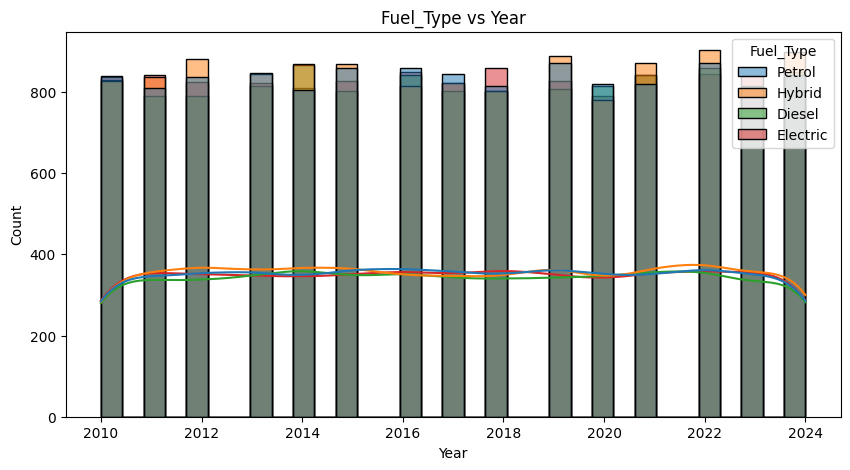

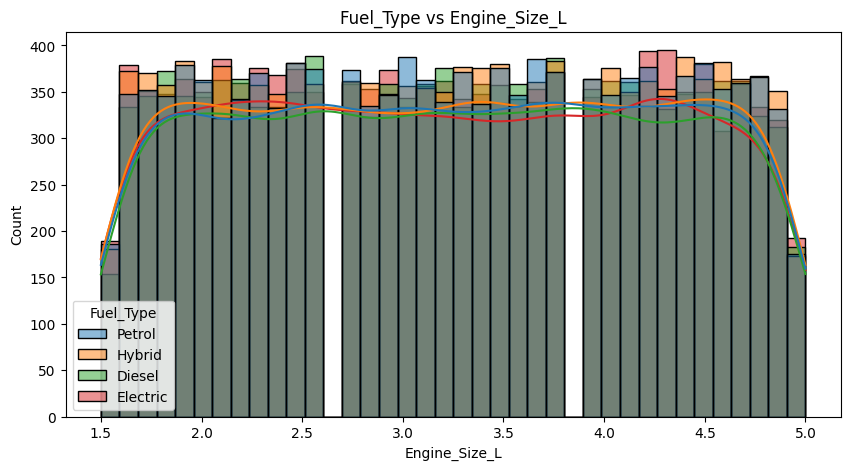

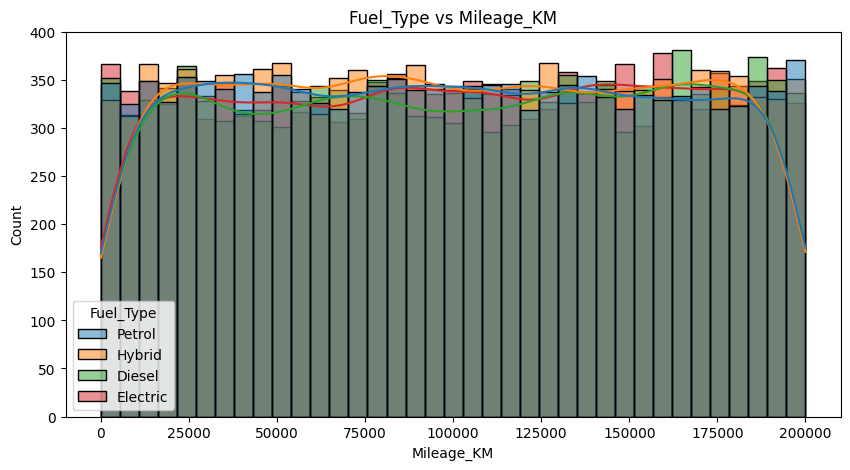

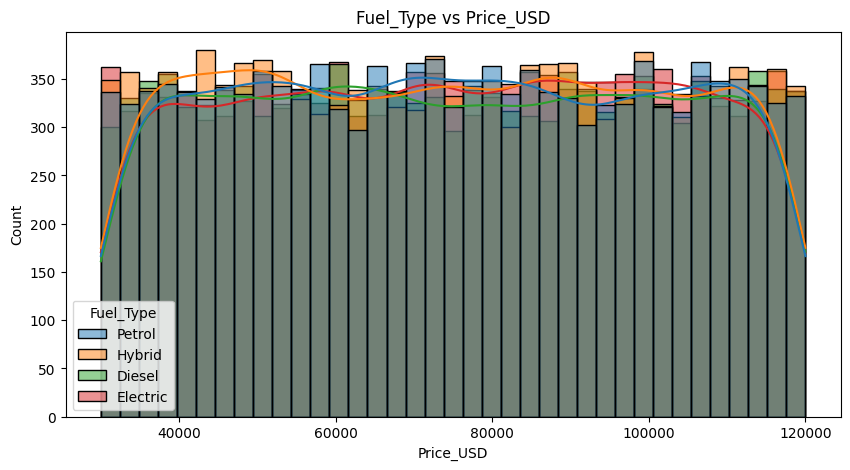

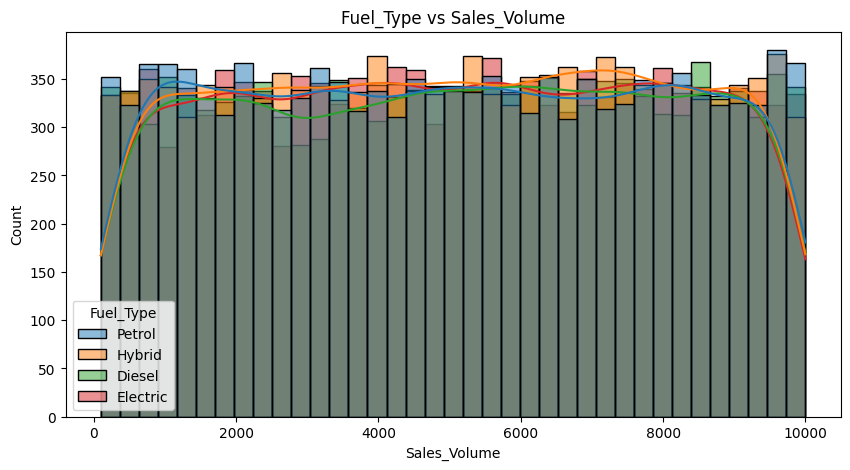

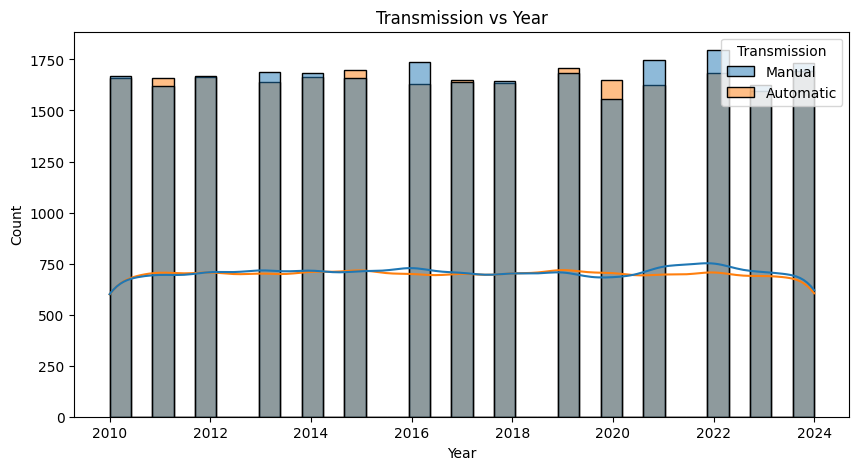

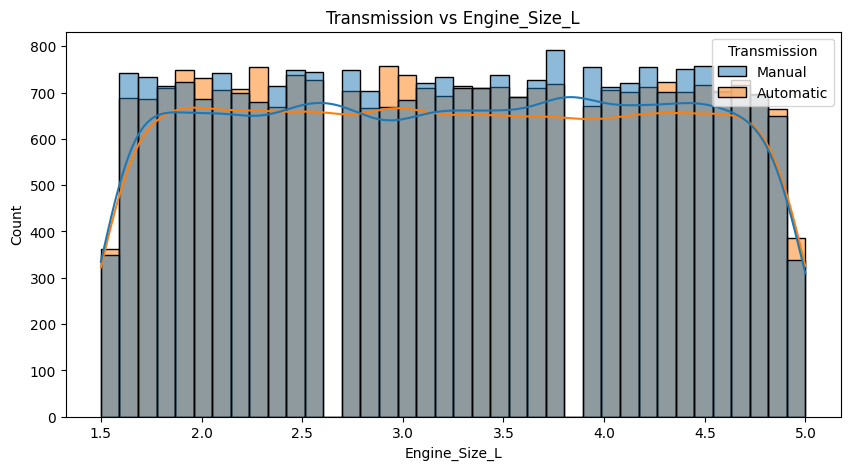

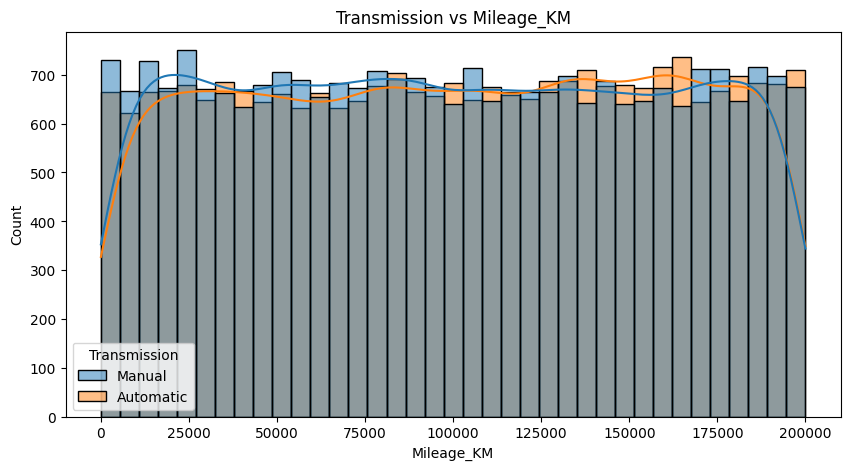

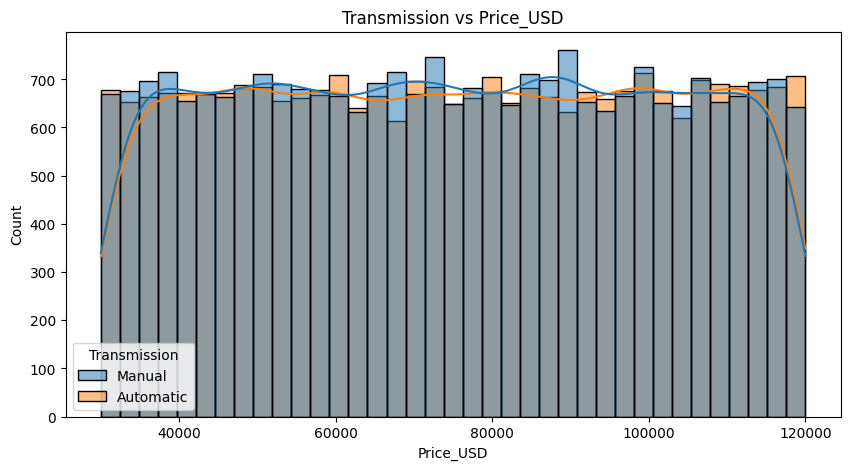

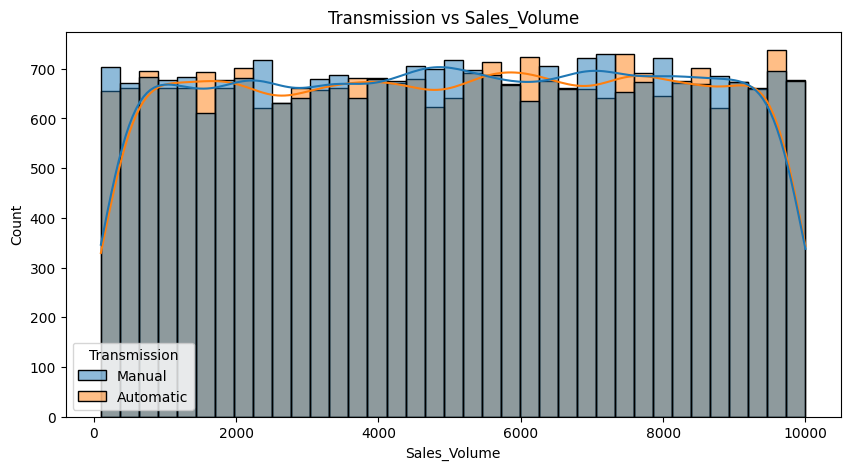

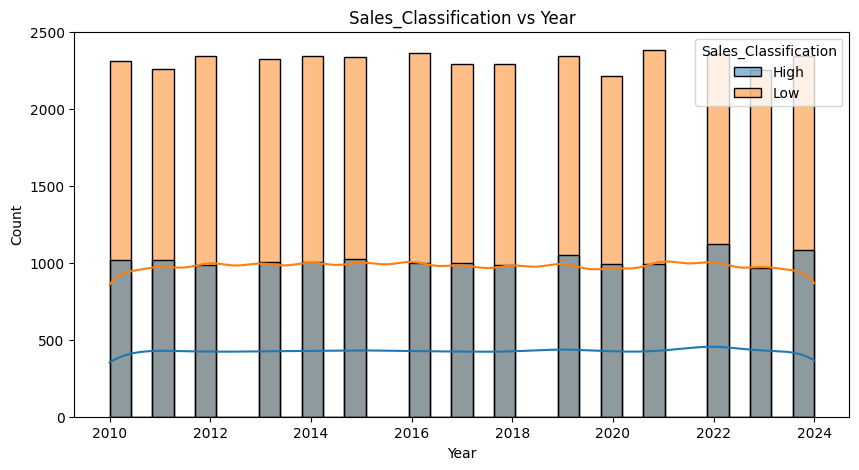

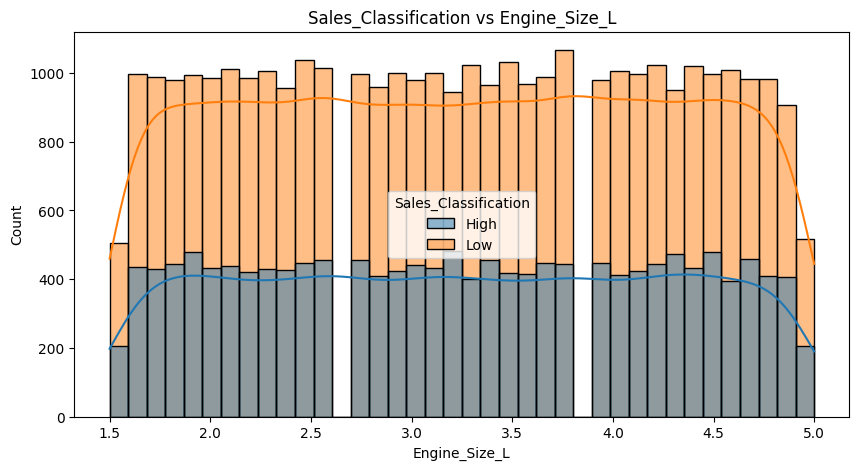

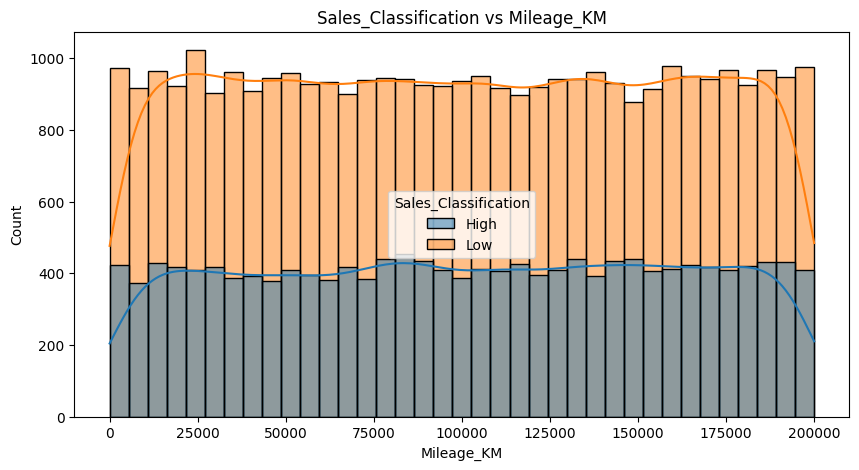

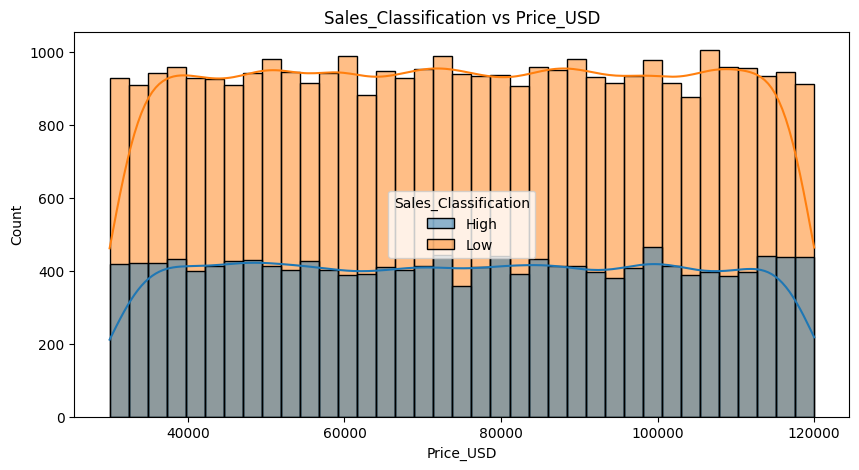

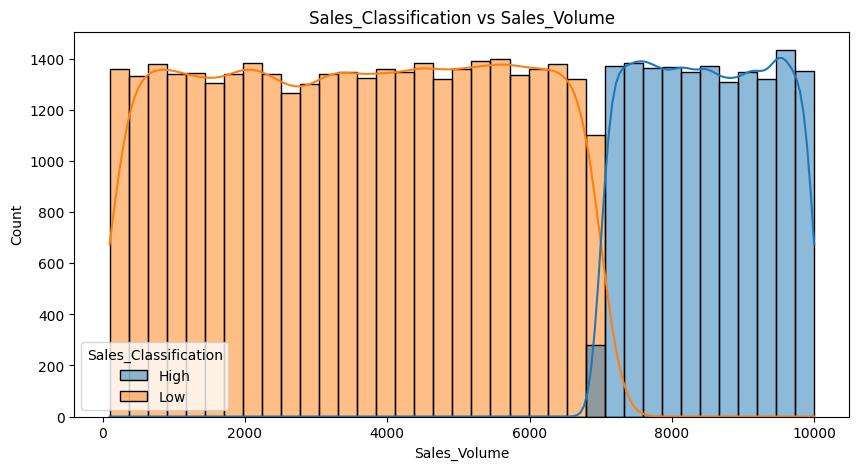

In [ ]:
for i in categorical_colum.columns:
  for j in Numerical_colum.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(x=j,hue=i,data=df,kde=True)
    plt.title(f'{i} vs {j}')
    plt.show()

For each pair of (categorical column, numerical column), it creates a histogram plot using seaborn.

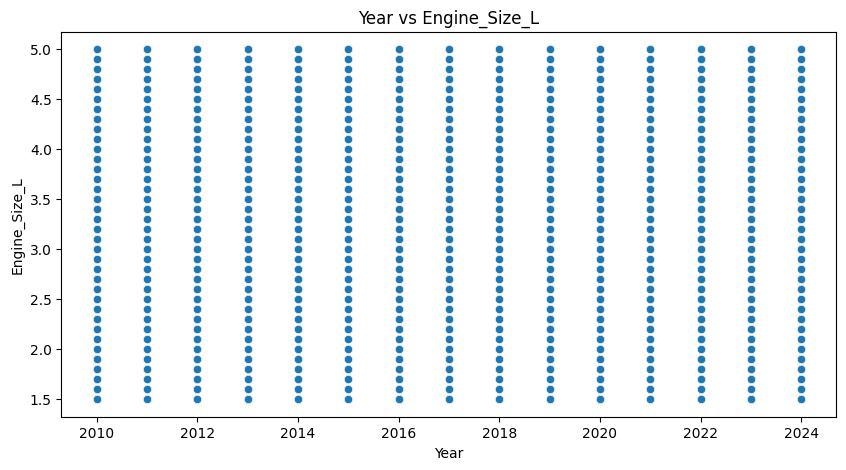

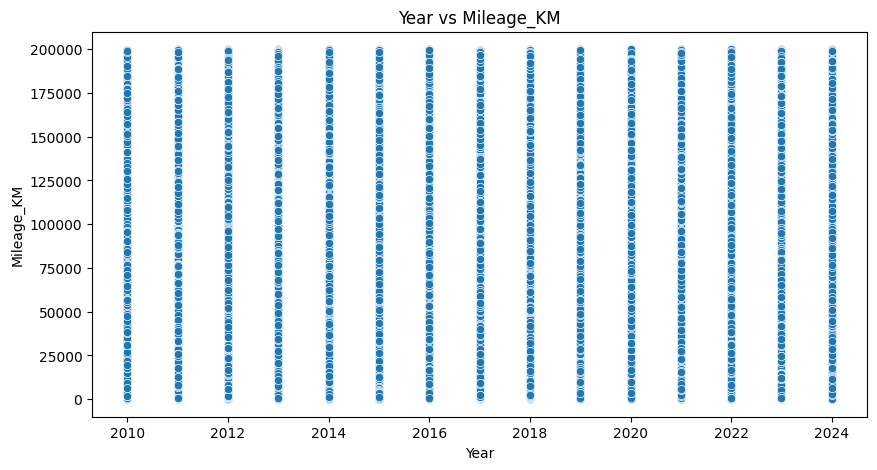

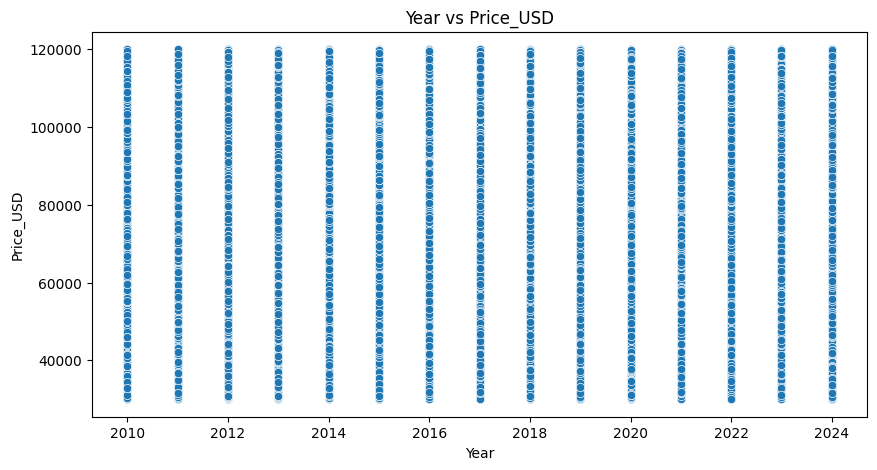

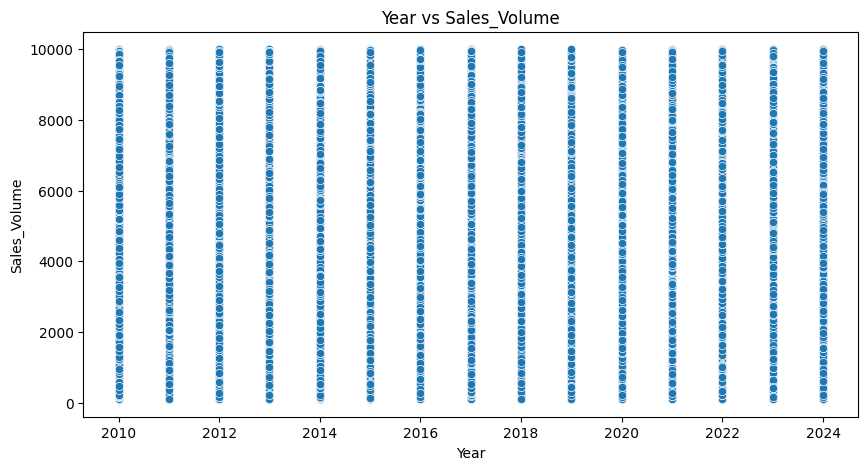

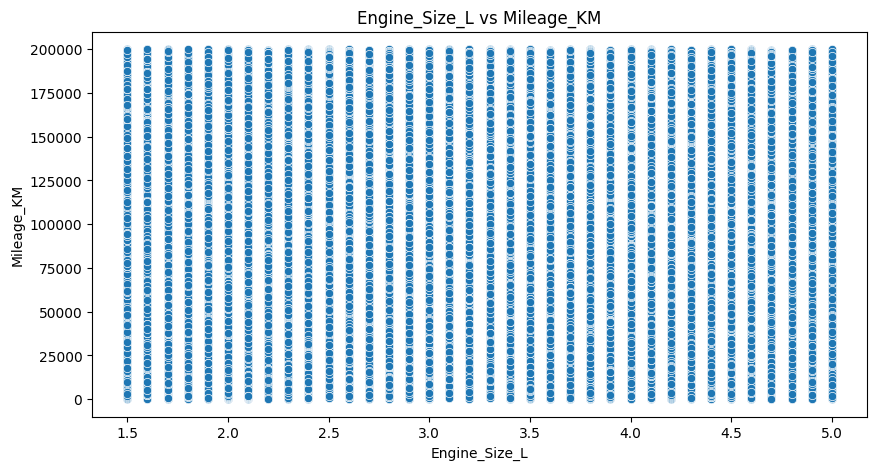

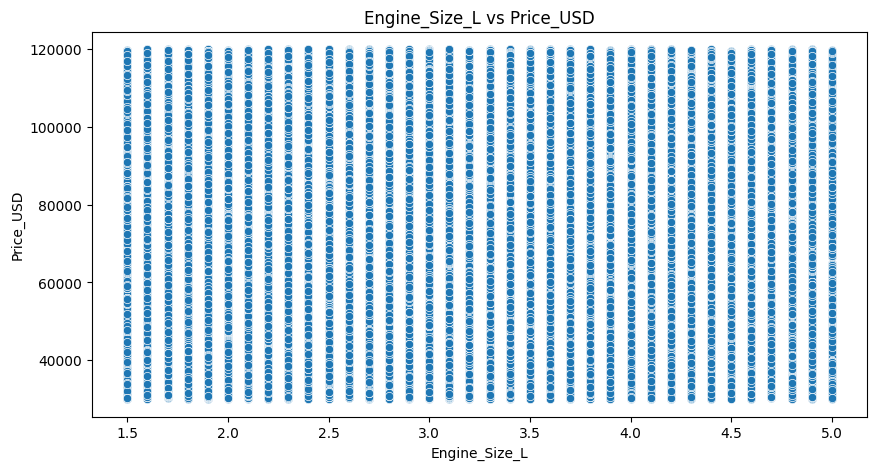

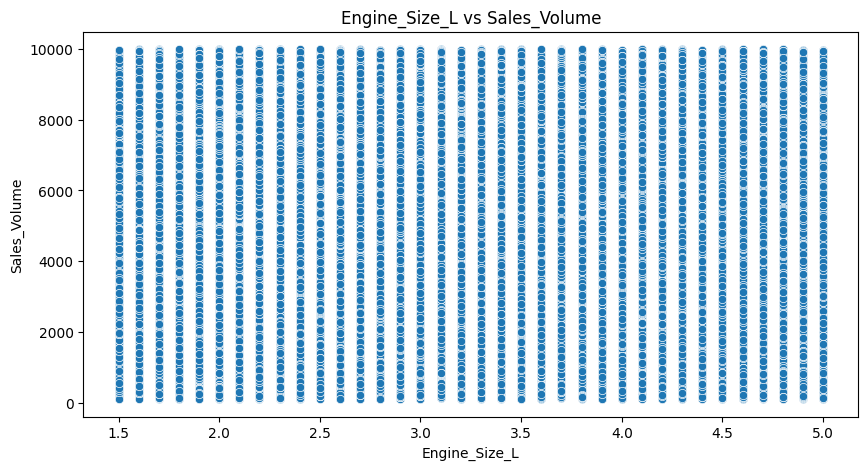

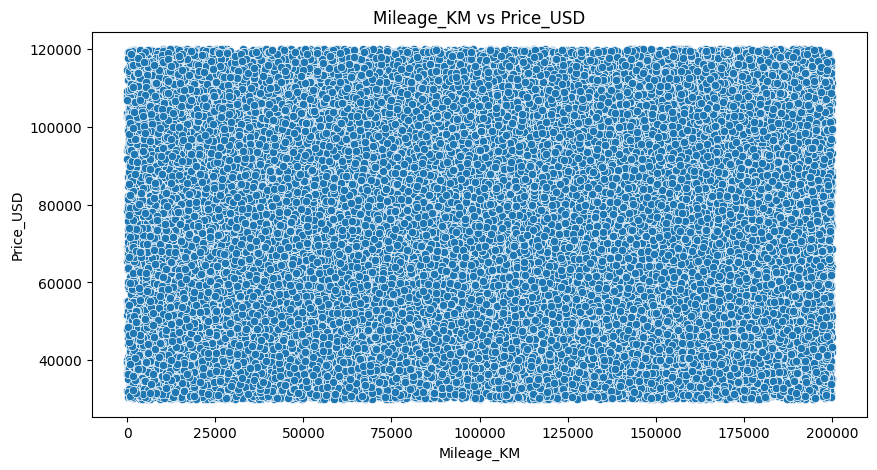

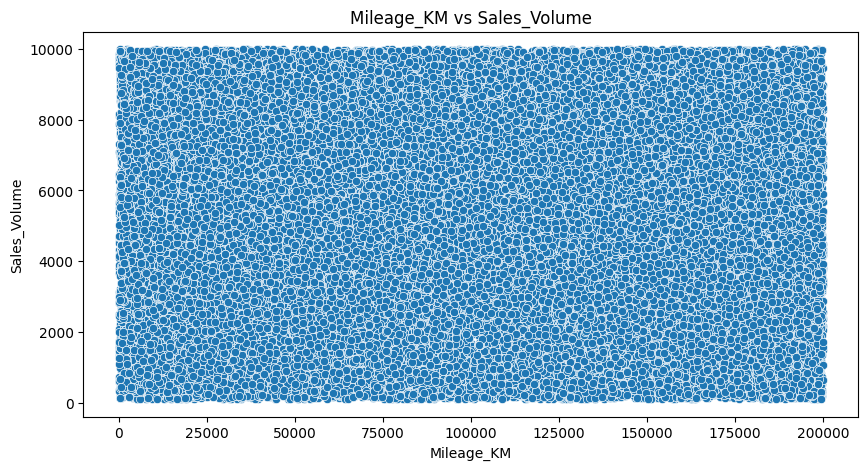

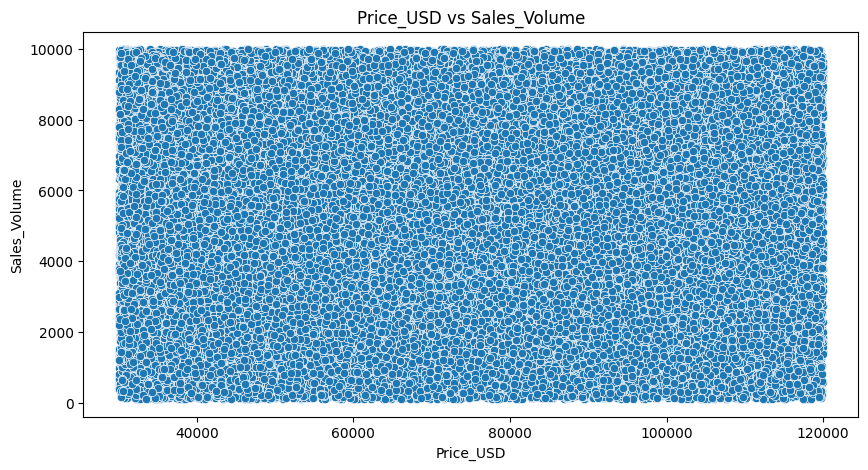

In [ ]:
for i in range(len(Numerical_colum.columns)):
  for j in range(i+1,len(Numerical_colum.columns)):
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=Numerical_colum.columns[i],y=Numerical_colum.columns[j],data=df)
    plt.title(f'{Numerical_colum.columns[i]} vs {Numerical_colum.columns[j]}')
    plt.show()

create a scatterplot for every pair of numerical columns in the DataFrame.

# **Prediction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
grouped=df.groupby('Year')[['Sales_Volume','Price_USD']].sum().reset_index()

Groups the data by the 'Year' column

In [ ]:
Sales_total=grouped['Sales_Volume']

Extract the 'Sales_Volume' column from your grouped DataFrame and store it as a new pandas Series named Sales_total

In [ ]:
year=df.groupby('Year').count().reset_index()

Groups your DataFrame by 'Year' and counts the number of records/rows for each year (for every column), then resets the index for a clean DataFrame.

In [ ]:
x=year['Year']
y=grouped['Sales_Volume']

The list of years from the year DataFrame to x

The total annual sales (already summed in grouped['Sales_Volume']) to y

In [ ]:
x

0     2010
1     2011
2     2012
3     2013
4     2014
5     2015
6     2016
7     2017
8     2018
9     2019
10    2020
11    2021
12    2022
13    2023
14    2024
Name: Year, dtype: int64

Display the X

In [ ]:
y

0     16933445
1     16758941
2     16751895
3     16866733
4     16958960
5     17010207
6     16957550
7     16620811
8     16412273
9     17191956
10    16310843
11    16884666
12    17920946
13    16268654
14    17527854
Name: Sales_Volume, dtype: int64

Display the y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)
x_train = x_train.to_frame()
x_test = x_test.to_frame()

Splits your x (years) and y (sales) into training and testing sets using a 90%-10% split.

Converts the x_train and x_test Series to DataFrames, so they work smoothly with scikit-learn estimators (like linear regression models).

In [ ]:
x_train

Year
8   2018
9   2019
14  2024
4   2014
2   2012
13  2023
10  2020
7   2017
11  2021
3   2013
0   2010
5   2015
12  2022

Display the X_train

In [ ]:
x_test

Year
1  2011
6  2016

Display the x_test Value

In [ ]:
y_train

8     16412273
9     17191956
14    17527854
4     16958960
2     16751895
13    16268654
10    16310843
7     16620811
11    16884666
3     16866733
0     16933445
5     17010207
12    17920946
Name: Sales_Volume, dtype: int64

Display the y_train Value

In [ ]:
y_test

1    16758941
6    16957550
Name: Sales_Volume, dtype: int64

Display the y_test Value

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Trains a linear regression model using your training years (x_train) to predict sales volumes (y_train).

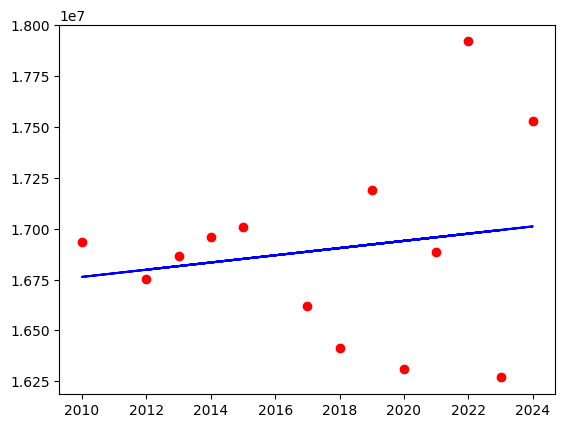

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.show()

Red dots: Actual sales from your training data (x_train, y_train)

Blue line: The predicted sales from your linear regression model on your training set (model.predict(x_train))

In [ ]:
pred=model.predict(x_test)
pred

array([16780894.77974277, 16869577.77170419])

predicts the BMW sales volumes for your test years (x_test) using your trained linear regression model and stores them in the variable pred

In [ ]:
y_test

1    16758941
6    16957550
Name: Sales_Volume, dtype: int64

Diaplay the y_test values

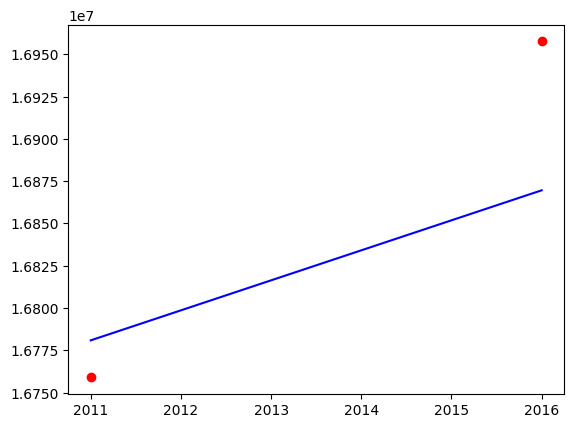

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,pred,color='blue')
plt.show()

Red dots: Actual sales volume in the test set (x_test, y_test)

Blue line: Predicted sales for those years from your trained model (x_test, pred)

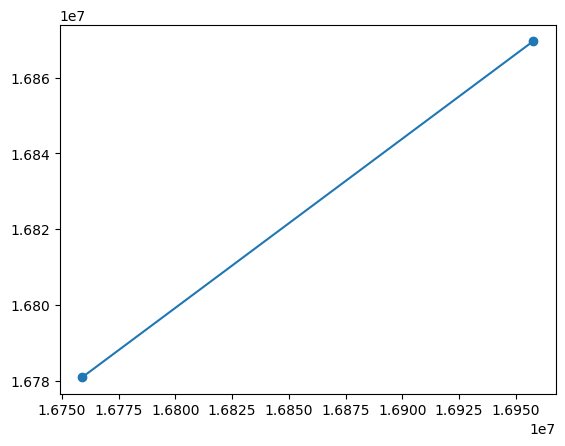

In [ ]:
plt.scatter(y_test,pred)
plt.plot([min(y_test),max(y_test)],[min(pred),max(pred)])
plt.show()

The scatterplot compares actual sales (y_test) with predicted sales (pred) for your test data.

Each dot shows one test year’s prediction vs its real value.

The diagonal line (from min to max) is the "perfect prediction" line—if your model were perfect, all dots would be on this line


In [ ]:
r2_score(y_test,pred)

0.5831679595104609

computes the R² score (coefficient of determination) for your model’s predictions.

Interpretation:

This means your model explains around 58% of the variance in BMW sales volume based on year in your test data.

It's an okay fit for simple linear prediction, but not excellent—often, more features or a more complex model improve results.

In [ ]:
mean_absolute_error(y_test,pred)

54963.00401929021

will return the mean absolute error (MAE) between your predicted and actual BMW sales values on the test set.

Interpretation:

Your predictions are off by an average of about 54,963 cars (or the unit of Sales_Volume) for each test year.

If this is a small percentage of typical sales, your model is relatively accurate; if it’s a large percentage, there’s likely room for improvement.

# **Predict for next 5 Years**

In [ ]:
X5=np.array(range(2025,2030))
X5=X5.reshape(-1,1)

prepares a numpy array X5 with the years 2025 to 2029 (inclusive), reshaped into a column vector suitable for prediction.



In [ ]:
pred5=model.predict(X5)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


predicts the BMW sales volume for the years 2025 to 2029 using your trained linear regression model.

In [ ]:
pred5

array([17029207.15723474, 17046943.75562701, 17064680.3540193 ,
       17082416.95241158, 17100153.55080386])

Your model forecasts BMW sales volume for 2025–2029 as:

2025: 17,029,207

2026: 17,046,944

2027: 17,064,680

2028: 17,082,417

2029: 17,100,153

Interpretation:

The predicted sales figures show a slight, steady increase each year according to your linear model.



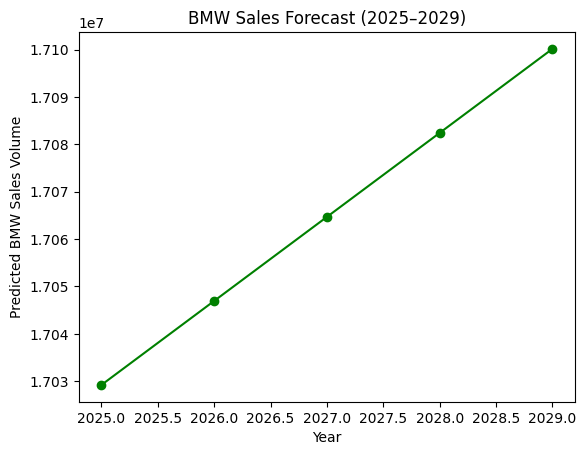

In [402]:
years = np.arange(2025, 2030)
plt.plot(years, pred5, marker='o', color='green')
plt.xlabel("Year")
plt.ylabel("Predicted BMW Sales Volume")
plt.title("BMW Sales Forecast (2025–2029)")
plt.show()

produce a forecast line plot for BMW sales through 2029 using your model.

Green line and dots: The model's predicted BMW sales volume for each year 2025 through 2029.

The trend shows projected steady growth according to your linear model.

